## Gradient Descent Variants

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0 , 20 )
Y = -2 * X + 1

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [47]:
def GD( X , Y , alpha , itterations):
  theta_0_list = []
  theta_1_list = []
  cost_list = []
  h_list = []
  theta_0 = 0
  theta_1 = 0   
  
  for i in range(itterations):
    h = theta_0 + theta_1 * X
    h_list.append(h)
    
    m = len(X)

    cost = (1/2*m) * np.sum( (h - Y)**2 )

    cost_list.append(cost)

    diff_theta_0 = (1/m) * np.sum( h - Y ) 
    diff_theta_1 = (1/m) * np.sum( (h - Y) * X )

    theta_0 = theta_0 - alpha * diff_theta_0
    theta_1 = theta_1 - alpha * diff_theta_1

    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    
    if (diff_theta_0**2 + diff_theta_1**2)**0.5  < 0.25:
        print(f"Stopped after {i} itterations ")
        break

  
  return h_list , cost_list , theta_0_list ,theta_1_list 


#### Try your function with any input parameterss of your choice.

In [48]:
h_list , cost_list , theta_0_list ,theta_1_list = GD( X , Y , 0.01 , 100)
print(h_list[-1])
print(Y)

Stopped after 63 itterations 
[ 2.80164548e-02 -7.58799906e-01 -1.54561627e+00 -2.33243263e+00
 -3.11924899e+00 -3.90606535e+00 -4.69288171e+00 -5.47969807e+00
 -6.26651444e+00 -7.05333080e+00 -7.84014716e+00 -8.62696352e+00
 -9.41377988e+00 -1.02005962e+01 -1.09874126e+01 -1.17742290e+01
 -1.25610453e+01 -1.33478617e+01 -1.41346780e+01 -1.49214944e+01
 -1.57083108e+01 -1.64951271e+01 -1.72819435e+01 -1.80687599e+01
 -1.88555762e+01 -1.96423926e+01 -2.04292089e+01 -2.12160253e+01
 -2.20028417e+01 -2.27896580e+01 -2.35764744e+01 -2.43632907e+01
 -2.51501071e+01 -2.59369235e+01 -2.67237398e+01 -2.75105562e+01
 -2.82973726e+01 -2.90841889e+01 -2.98710053e+01 -3.06578216e+01
 -3.14446380e+01 -3.22314544e+01 -3.30182707e+01 -3.38050871e+01
 -3.45919034e+01 -3.53787198e+01 -3.61655362e+01 -3.69523525e+01
 -3.77391689e+01 -3.85259852e+01]
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.979591

#### Calculate r2 score

In [49]:
from sklearn.metrics import r2_score
r2_score(Y,  h_list[-1])

0.9982464646575209

#### Plot loss vs. epochs

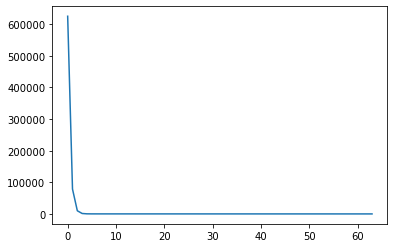

In [50]:
plt.plot(cost_list)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

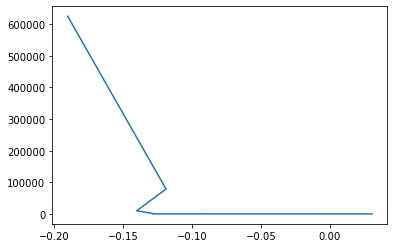

In [51]:
plt.plot(theta_0_list,cost_list)

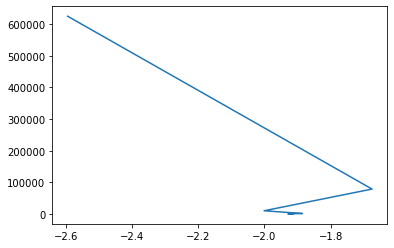

In [52]:
plt.plot(theta_1_list,cost_list)

#### Plot all regression lines till converge

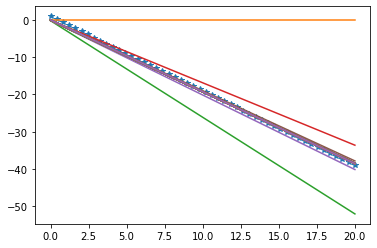

In [53]:
plt.plot(X,Y , "*")
for i in h_list:
  plt.plot(X,i)
plt.show()

#### Plot the best regression line

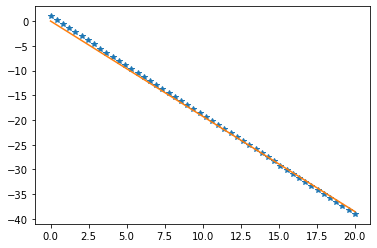

In [54]:
plt.plot(X,Y , "*")
plt.plot(X,h_list[-1])
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [12]:
h_list , cost_list , theta_0_list ,theta_1_list = GD( X , Y , 0.001 , 1000)
print(h_list[-1])
print(Y)

[  0.11552903  -0.67394428  -1.46341759  -2.2528909   -3.04236421
  -3.83183752  -4.62131083  -5.41078414  -6.20025745  -6.98973076
  -7.77920407  -8.56867738  -9.3581507  -10.14762401 -10.93709732
 -11.72657063 -12.51604394 -13.30551725 -14.09499056 -14.88446387
 -15.67393718 -16.46341049 -17.2528838  -18.04235711 -18.83183042
 -19.62130373 -20.41077704 -21.20025035 -21.98972366 -22.77919697
 -23.56867028 -24.3581436  -25.14761691 -25.93709022 -26.72656353
 -27.51603684 -28.30551015 -29.09498346 -29.88445677 -30.67393008
 -31.46340339 -32.2528767  -33.04235001 -33.83182332 -34.62129663
 -35.41076994 -36.20024325 -36.98971656 -37.77918987 -38.56866318]
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.4081

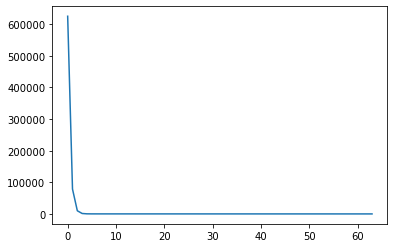

In [55]:
plt.plot(cost_list)

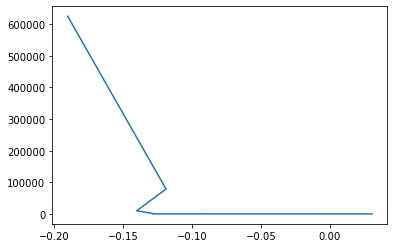

In [56]:
plt.plot(theta_0_list,cost_list)

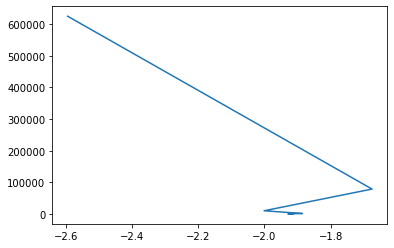

In [57]:
plt.plot(theta_1_list,cost_list)

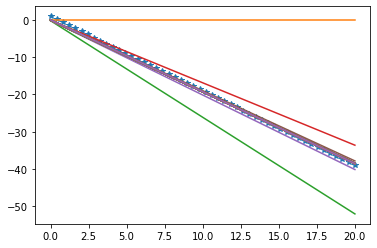

In [58]:
plt.plot(X,Y , "*")
for i in h_list:
  plt.plot(X,i)
plt.show()

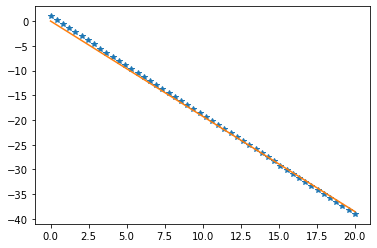

In [59]:
plt.plot(X,Y , "*")
plt.plot(X,h_list[-1])
plt.show()

#### Update the implementation of the Batch GD to be MiniBatch Gradient Descent**
** and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [60]:
import numpy as np
X = np.linspace(0 , 20 )
Y = -2 * X + 1
print(X[ 0 :  10 , ])


[0.         0.40816327 0.81632653 1.2244898  1.63265306 2.04081633
 2.44897959 2.85714286 3.26530612 3.67346939]


In [93]:
def GD_Mini_Batch( X , Y , alpha , itterations, b ):
  theta_0_list = []
  theta_1_list = []
  cost_list = []
  h_list = []
  theta_0 = 0
  theta_1 = 0
  m = len(X)

  for i in range(itterations):

    for j in range(0 ,  b):  #X is a matrix with len(X)/batches rows
      x_mini = X[j * b : (j + 1) * b ]
      y_mini = Y[j * b : (j + 1) * b ]

      h = theta_0 + theta_1 * x_mini
      
      
      m = len(X)

      cost = (1/2*m/b) * np.sum( (h - y_mini) **2 )


      diff_theta_0 = (1/m) * np.sum( h - y_mini ) 
      diff_theta_1 = (1/m) * np.sum( (h - y_mini) * x_mini )

    theta_0 = theta_0 - alpha * diff_theta_0
    theta_1 = theta_1 - alpha * diff_theta_1

    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    cost_list.append(cost)

    h_list.append(h)
    if (diff_theta_0**2 + diff_theta_1**2)**0.5  < 0.25:
        print(f"Stopped after {i} itterations ")
        break
    

  return h_list , cost_list , theta_0_list ,theta_1_list 


In [128]:
h_list , cost_list , theta_0_list ,theta_1_list = GD_Mini_Batch( X , Y , 0.005 , 100 , 7)

h = theta_0_list[-1] + X * theta_1_list[-1]

Stopped after 22 itterations 


In [129]:
from sklearn.metrics import r2_score

print(f'R2 score for miniBatch is {r2_score(Y,  h)}')

R2 score for miniBatch is 0.9974125636634831


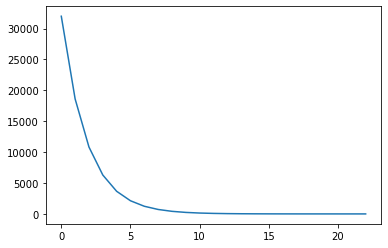

In [131]:
import matplotlib.pyplot as plt
plt.plot(cost_list)
plt.show()

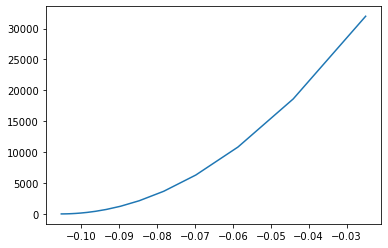

In [132]:
plt.plot(theta_0_list,cost_list)
plt.show()

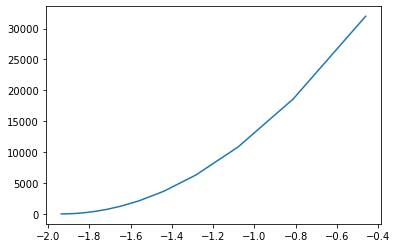

In [133]:
plt.plot(theta_1_list,cost_list)
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [99]:
X = np.linspace(0 , 20 )
Y = -2 * X + 1


In [151]:
def GD_Stochastic( X , Y , alpha , itterations):
  theta_0_list = []
  theta_1_list = []
  cost_list = []
  h_list = []
  theta_0 = 0
  theta_1 = 0
  m = len(X)
  
  for i in range(itterations):
    

    for j in range(len(X)):

      h = theta_0 + theta_1 * X[j]
      h_list.append(h)
      

      diff_theta_0 =   h - Y 
      diff_theta_1 =  (h - Y) * X[j] 

      theta_0 = theta_0 - alpha * diff_theta_0
      theta_1 = theta_1 - alpha * diff_theta_1  
    
      
    
    cost = (1/2) *  (h - Y)**2 
    cost_list.append(np.sum(cost))
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
  

  return h_list , cost_list , theta_0_list ,theta_1_list 


In [152]:
h_list , cost_list , theta_0_list ,theta_1_list = GD_Stochastic( X , Y , 0.005 , 60)
print(h_list[-1])
print(Y)

[  1.00096043   0.18384987  -0.63326068  -1.45037123  -2.26748179
  -3.08459234  -3.90170289  -4.71881345  -5.535924    -6.35303455
  -7.17014511  -7.98725566  -8.80436621  -9.62147677 -10.43858732
 -11.25569787 -12.07280843 -12.88991898 -13.70702953 -14.52414009
 -15.34125064 -16.1583612  -16.97547175 -17.7925823  -18.60969286
 -19.42680341 -20.24391396 -21.06102452 -21.87813507 -22.69524562
 -23.51235618 -24.32946673 -25.14657728 -25.96368784 -26.78079839
 -27.59790894 -28.4150195  -29.23213005 -30.0492406  -30.86635116
 -31.68346171 -32.50057227 -33.31768282 -34.13479337 -34.95190393
 -35.76901448 -36.58612503 -37.40323559 -38.22034614 -39.03745669]
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.4081

In [153]:
r2_score(Y,  h_list[-1])

0.9999966780599778

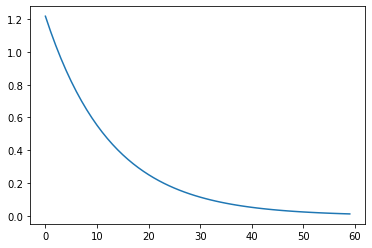

In [154]:
import matplotlib.pyplot as plt
plt.plot(cost_list)
plt.show()